### Problem Statement: Flipkart Products Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

#### 1. Data Ingestion:
###### Data Acquired from "https://www.kaggle.com/datasets/atharvjairath/flipkart-ecommerce-dataset"

In [2]:
df = pd.read_csv("flipkart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

#### 1.1 Data Preparation

In [3]:
df.shape

(20002, 15)

In [4]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [5]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

#### Insight: 'retail_price' will be the target feature

#### 1.2. Data Wrangling

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19997    False
19998    False
19999    False
20000    False
20001     True
Length: 20002, dtype: bool

In [7]:
#check for null values
df.isnull().sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [8]:
# separate the features as categorical and numerical
categorical = list(df.select_dtypes(include='O').columns)
categorical

['uniq_id',
 'crawl_timestamp',
 'product_url',
 'product_name',
 'product_category_tree',
 'pid',
 'image',
 'is_FK_Advantage_product',
 'description',
 'product_rating',
 'overall_rating',
 'brand',
 'product_specifications']

In [9]:
numerical = list(df.select_dtypes(exclude='O').columns)
numerical

['retail_price', 'discounted_price']

<Axes: >

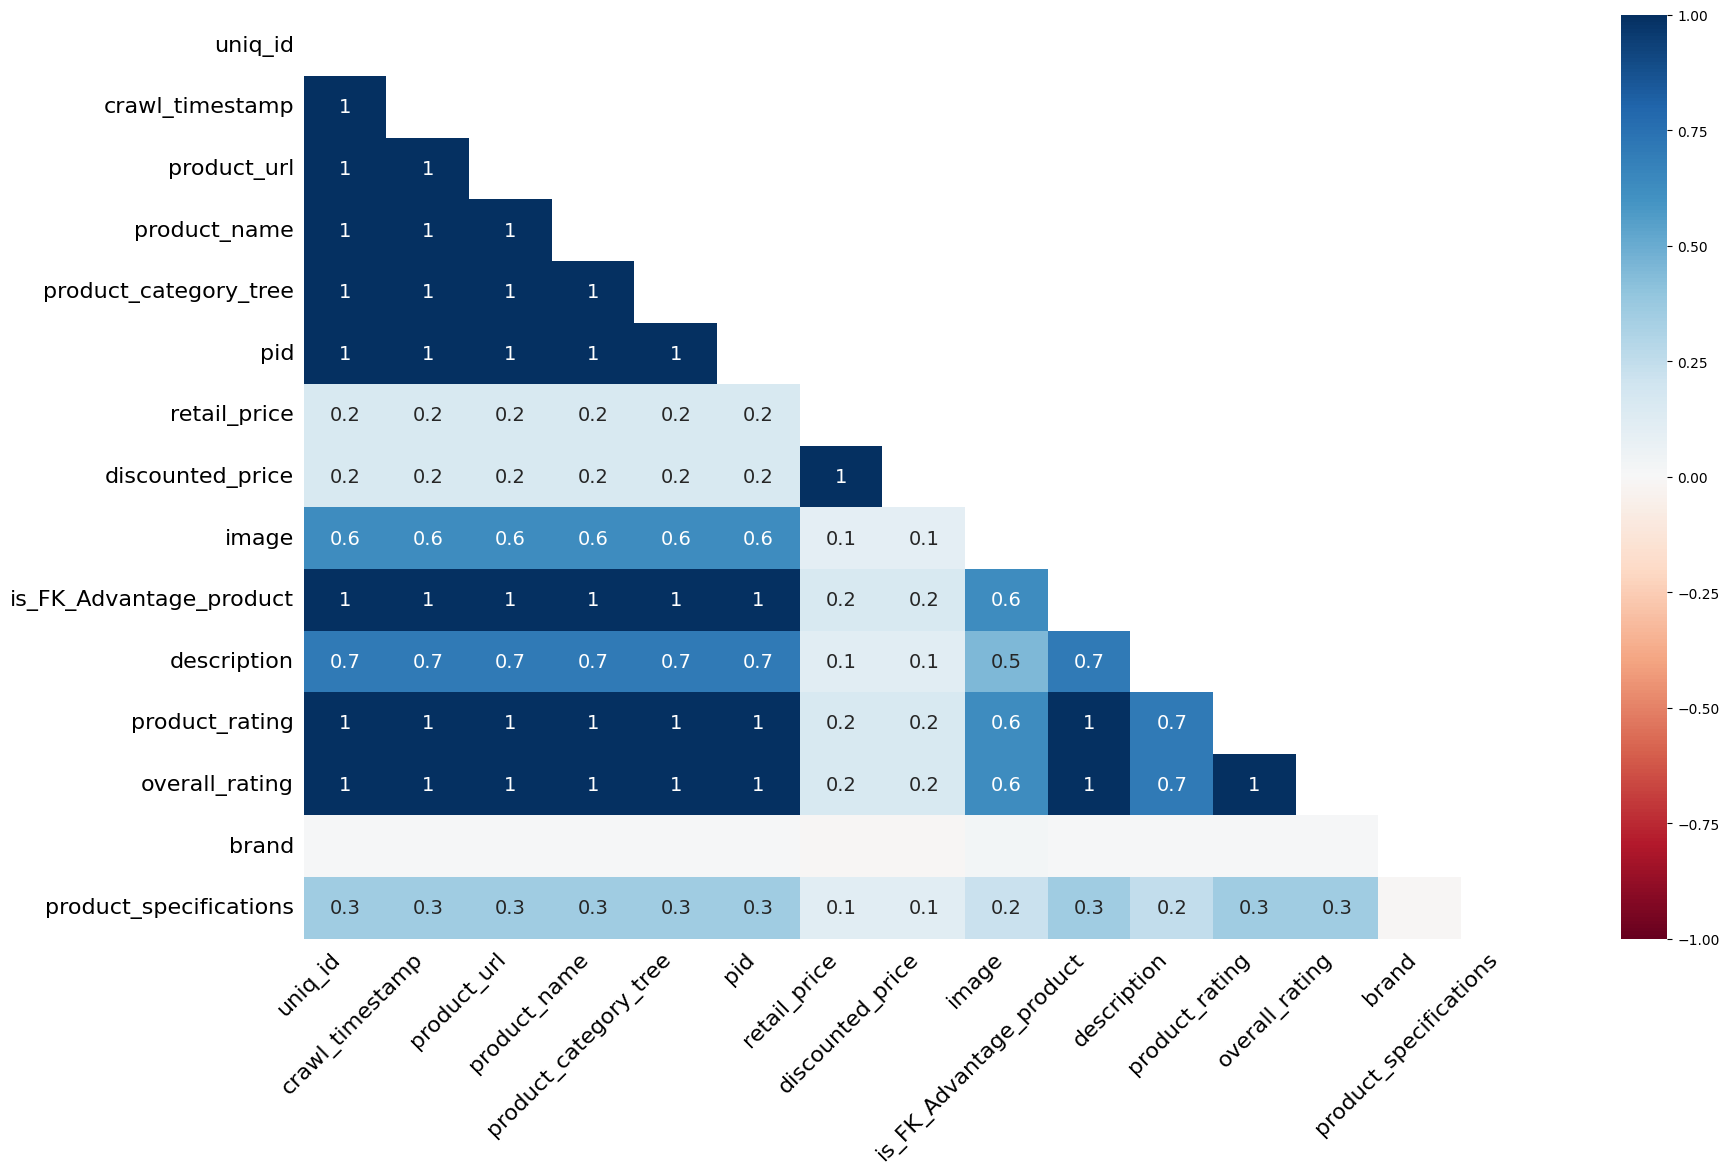

In [10]:
# visualizing the locations of missing values as correlation matrix 
msno.heatmap(df)

In [11]:
# statistical description of the numerical features
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
retail_price,19922.0,2979.206104,9009.639341,35.0,666.0,1040.0,1999.0,571230.0
discounted_price,19922.0,1973.401767,7333.586040,35.0,350.0,550.0,999.0,571230.0


In [12]:
# fill the null values of the numerical features(Series) with mean of each feature(Series)
for col in df[numerical]:
    df[col]=df[col].fillna(df[col].mean())

In [13]:
df[numerical].isnull().sum()

retail_price        0
discounted_price    0
dtype: int64

In [14]:
# fill the null values of the categorical features(Series) with the most frequent value in each feature
for col in df[categorical]:
    df[col]=df[col].fillna(df[col].mode()[0])

In [15]:
df[categorical].isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

In [16]:
df.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

#### 2 Exploratory Data Analysis (EDA)

<Axes: title={'center': 'Retail Price'}, xlabel='retail_price', ylabel='Count'>

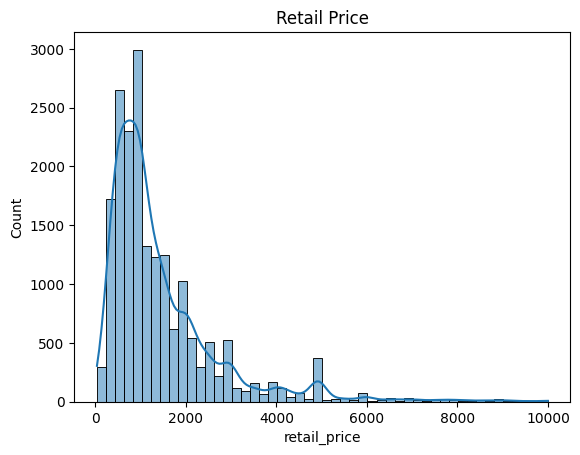

In [17]:
plt.title("Retail Price")
sns.histplot(df.retail_price[df.retail_price < 10000], kde=True, bins = 50)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "d:\code\flipkart_capstone2\nenv\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\hp\AppData\Local\Temp\ipykernel_3052\1215116105.py", line 7, in <module>
    ax = sns.histplot(data=df, x=df.retail_price, hue=df[col], multiple="stack")
  File "d:\code\flipkart_capstone2\nenv\lib\site-packages\seaborn\distributions.py", line 1416, in histplot
    p.plot_univariate_histogram(
  File "d:\code\flipkart_capstone2\nenv\lib\site-packages\seaborn\distributions.py", line 508, in plot_univariate_histogram
    histograms, baselines = self._resolve_multiple(histograms, multiple)
  File "d:\code\flipkart_capstone2\nenv\lib\site-packages\seaborn\distributions.py", line 260, in _resolve_multiple
    curves[cols] = curves[cols].cumsum(axis="columns")
  File "d:\code\flipkart_capstone2\nenv\lib\site-packages\pandas\core\frame.py", line 4079, in __setitem__
    self

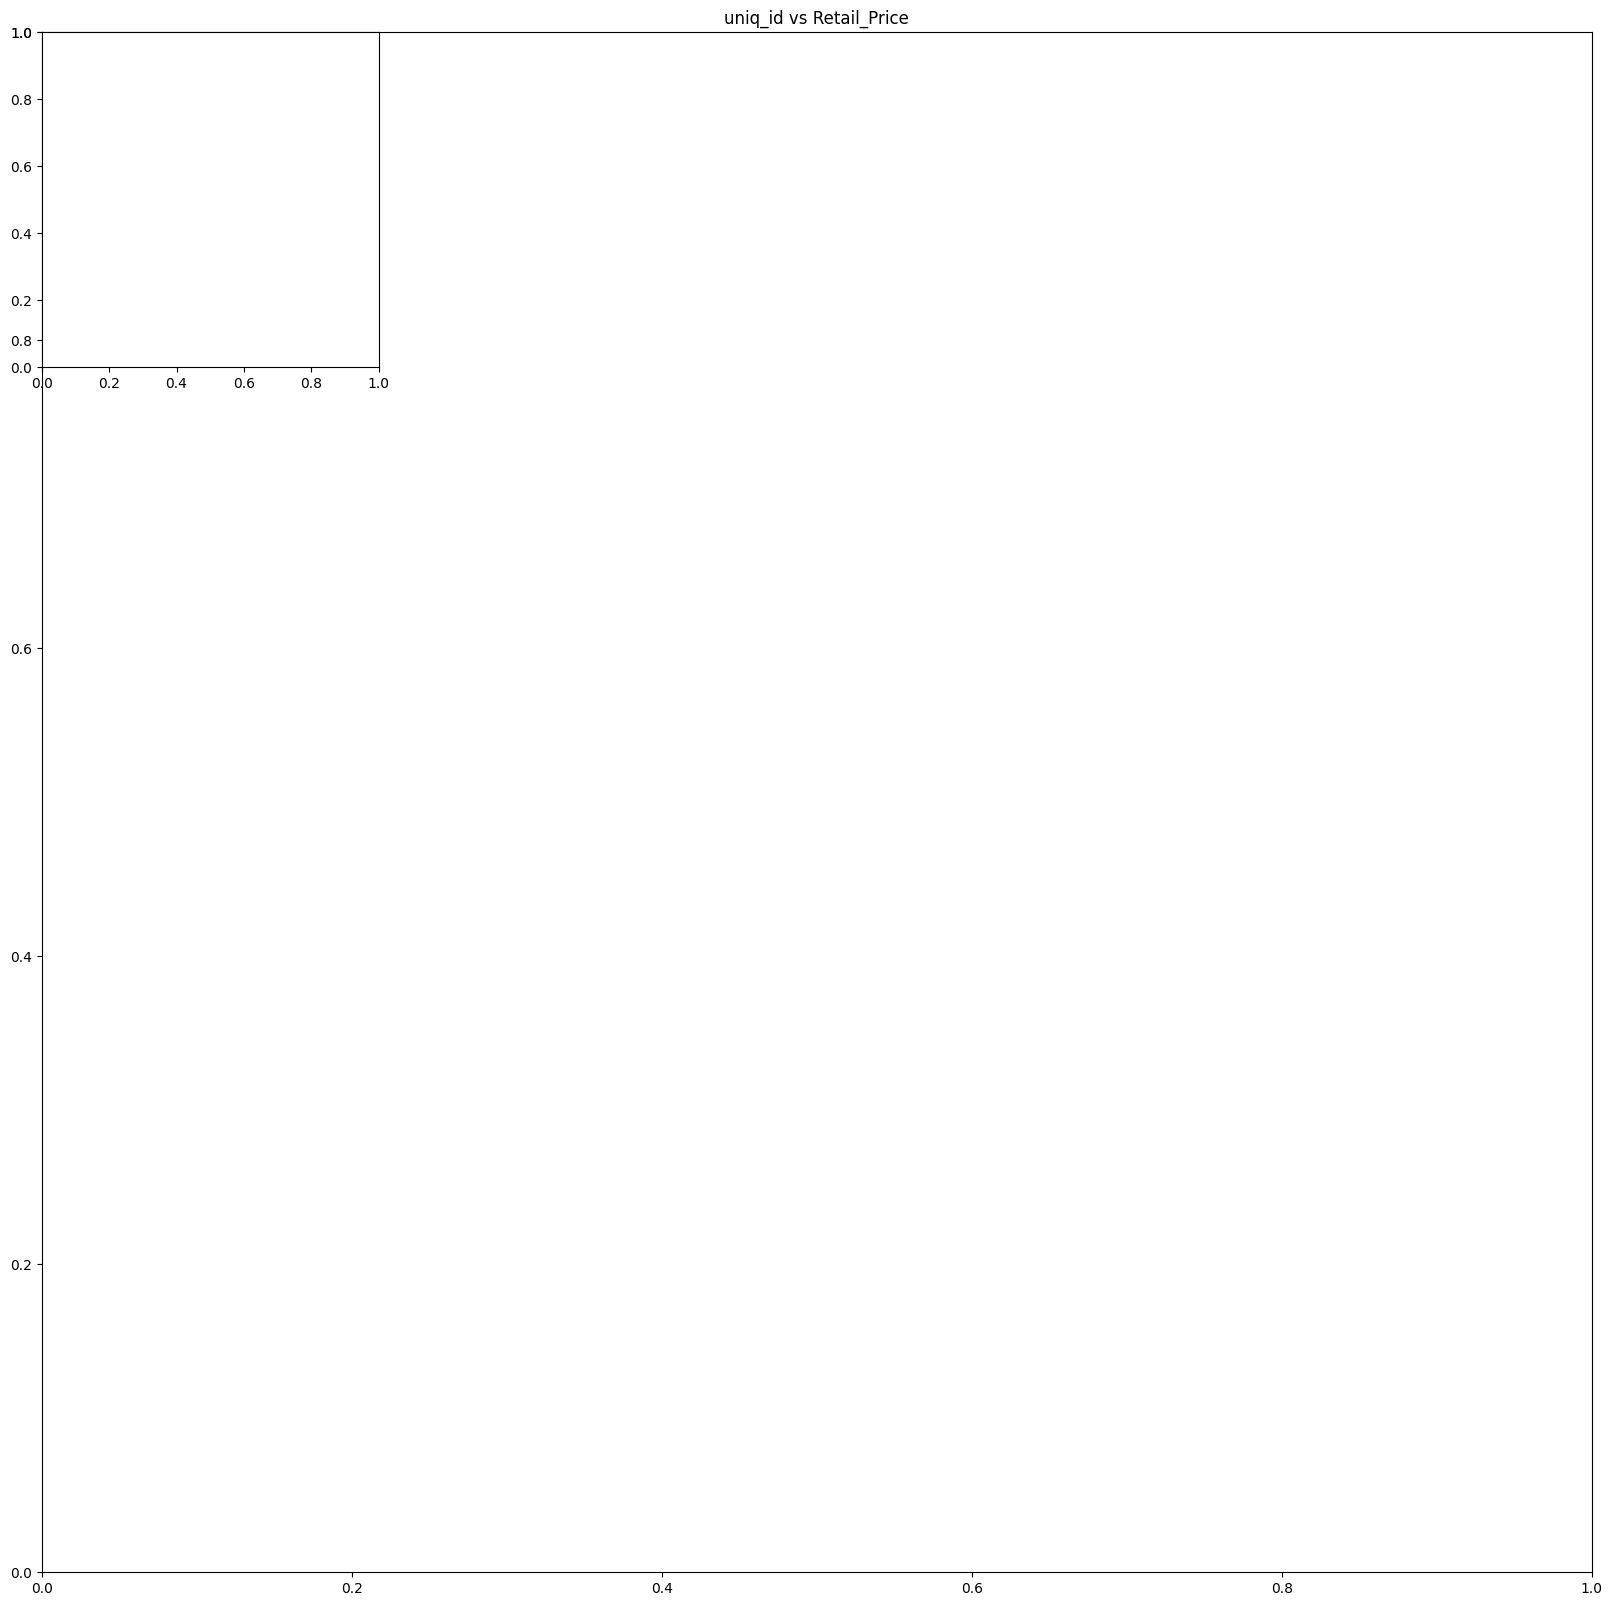

In [22]:
plt.title("Discounted Price")
sns.histplot(df.discounted_price, kde=True, bins = 50)